In [127]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import shapiro, zscore
import numpy as np
from brokenaxes import brokenaxes
import datetime

In [129]:
# Function to create the dataframes per framework
# Also removed outliers
def create_df (framework):
    dir = f"results/{framework}"
    csv_files = [f for f in os.listdir(dir) if f.endswith('.csv')]
    energy_values = []
    
    for file in csv_files:
        file_path = os.path.join(dir, file)
        df = pd.read_csv(file_path)
        
        if 'PACKAGE_ENERGY (J)' in df.columns:
            energy_diff = df['PACKAGE_ENERGY (J)'].iloc[-1] - df['PACKAGE_ENERGY (J)'].iloc[0]
            time_diff = df['Time'].iloc[-1] - df['Time'].iloc[0]
            
            energy_values.append({"PACKAGE ENERGY (J)": energy_diff, "EDP": time_diff })
        else:
            print(f"Skipping {file}, 'PACKAGE_ENERGY (J)' column not found.")
            
    energy_df = pd.DataFrame(energy_values)
    energy_df["Framework"] = framework.capitalize()
    z_scores = zscore(energy_df['PACKAGE ENERGY (J)'])
    energy_df = energy_df[np.abs(z_scores) < 2]
    return energy_df

In [130]:
df_express = create_df("express")
df_flask = create_df("flask")
df_spring = create_df("springboot")
df = pd.concat([df_spring, df_express, df_flask])

In [131]:
_, p_express = shapiro(df_express['PACKAGE ENERGY (J)'])
_, p_flask = shapiro(df_flask['PACKAGE ENERGY (J)'])
_, p_spring = shapiro(df_spring['PACKAGE ENERGY (J)'])
print(f"P-Value Express: {p_express}\nP-Value Flask: {p_flask}\nP-Value Springboot: {p_spring}")

P-Value Express: 0.36511326801092014
P-Value Flask: 0.1815865174558831
P-Value Springboot: 0.5862615714192757


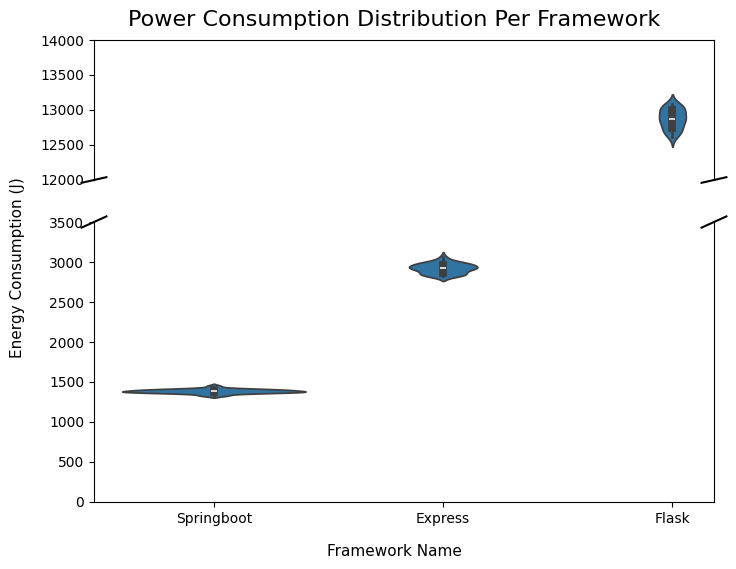

In [181]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8,6), gridspec_kw={'height_ratios': [1,2]})

sns.violinplot(x="Framework", y="PACKAGE ENERGY (J)", data=df, ax=ax1)
sns.violinplot(x="Framework", y="PACKAGE ENERGY (J)", data=df, ax=ax2)

ax1.set_ylim(12000, 14000)
ax2.set_ylim(0, 3500)
ax1.set_ylabel('')
ax2.set_ylabel('')
ax2.set_xlabel('')

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.set_visible(False)

d = 0.02  # Diagonal line size
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)  # Top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top-right diagonal

kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom-right diagonal

# Final plot
plt.suptitle("Power Consumption Distribution Per Framework", y=0.93, fontsize=16)
fig.text(0.02, 0.5, 'Energy Consumption (J)', va="center", rotation="vertical", fontsize=11)
fig.text(0.5, 0.02, 'Framework Name', ha='center', fontsize=11)
# plt.ylabel("PACKAGE ENERGY (J)")
plt.show()


Text(0, 0.5, '')

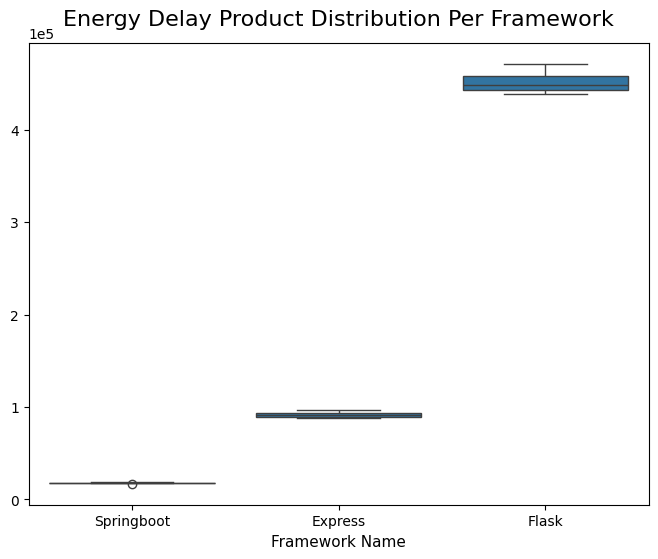

In [171]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Framework', y='EDP', data=df)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.title('Energy Delay Product Distribution Per Framework', fontsize=16, y=1.02)
plt.xlabel('Framework Name', fontsize=11)
plt.ylabel('')